# BACTERIA

In [124]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### ALPHA & BETA DIVERSITY
1. make a MAFFT tree
2. alpha rarefaction
3. alpha diversity
4. beta diversity

In [2]:
#import packages
import os
import dokdo
import qiime2 as q2
import seaborn as sns
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
from qiime2.plugins import phylogeny
from qiime2.plugins import diversity
from skbio import DistanceMatrix
import qiime2.plugins.phylogeny.actions as phylogeny_actions

In [126]:
# define workdir
%env WORKDIR /home/nezapa/qiime-thesis
WORKDIR = os.environ.get("WORKDIR")

env: WORKDIR=/home/nezapa/qiime-thesis


In [127]:
# import data
denoisetable_ba = q2.Artifact.load('./results/denoisetable_ba.qza')
rep_seqs_ba = q2.Artifact.load('./results/rep_seqs_ba.qza')
denoising_stats = q2.Artifact.load('./results/denoising_stats.qza')
sample_metadata = q2.Metadata.load('../00.sample-metadata.tsv')

In [128]:
from qiime2.plugins import feature_table

# summarise and visualise
feature_table.visualizers.summarize(
    table = denoisetable_ba,
    sample_metadata = sample_metadata
).visualization

<visualization: Visualization uuid: 97bfc346-8575-4045-acdb-78f7c0baa3ca>

## TREE

In [129]:
action_results = phylogeny_actions.align_to_tree_mafft_fasttree(
    sequences=rep_seqs_ba,
)
aligned_rep_seqs = action_results.alignment
masked_aligned_rep_seqs = action_results.masked_alignment
unrooted_tree = action_results.tree
rooted_tree = action_results.rooted_tree

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 1 /tmp/qiime2-archive-w881__4i/673d5c38-7e5b-4a04-9163-cf9a209d67d0/data/dna-sequences.fasta



inputfile = orig
416 x 260 - 260 d
nthread = 1
nthreadpair = 1
nthreadtb = 1
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  401 / 416 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 
  410 / 416
done.

Progressive alignment 1/2... 
STEP    42 / 415 (thread    0)
Reallocating..done. *alloclen = 1525
STEP   415 / 415 (thread    0) h
done.

Making a distance matrix from msa.. 
  400 / 416 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
  410 / 416
done.

Progressive alignment 2/2... 
STEP   194 / 415 (thread    0)
Reallocating..done. *alloclen = 1521
STEP   415 / 415 (thread    0) h
done.

disttbfast (nuc) Version 7.505
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto 

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTree -quote -nt /tmp/qiime2-archive-u3bepmg9/fdfa7edb-ba6c-46f1-a001-cb4308d9889d/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: /tmp/qiime2-archive-u3bepmg9/fdfa7edb-ba6c-46f1-a001-cb4308d9889d/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
      0.14 seconds: Joined    100 of    399
      0.28 seconds: Joined    300 of    399
Initial topology in 0.34 seconds
Refining topology: 35 rounds ME-NNIs, 2 rounds ME-SPRs, 17 rounds ML-NNIs
      0.38 seconds: ME NNI round 2 of 35, 301 of 400 splits, 31 changes (max delta 0.181)
      0.54 seconds: SPR round   1 of   2, 101 of 802 nodes
      0.75 seconds: SPR round   1 of   2, 301 of 802 nodes
      0.86 seconds: SPR round   1 of   2, 401 of 802 nodes
      0.98 seconds: SPR round   1 of   2, 501 of 802 nodes
      1.11 seconds: SPR round   1 of   2, 601 of 802 nodes
      1.2

## ALPHA AND BETA DIVERSITY

In [130]:
# # choose a round number in the 3rd quartile frequency per sample from the feature table visual summary
# # this step can take some time
# alpha_rarefaction_all = diversity.actions.alpha_rarefaction(
#     table = denoisetable_ba,
#     max_depth = 40000,
#     phylogeny = rooted_tree,
#     metrics = {'observed_features'},
#     metadata = sample_metadata,
#     steps = 1000
# )

In [3]:
# save alpha_rarefacion
# alpha_rarefaction_all.visualization.save('./results/alpha_rarefaction_40000.qzv')
qzv_file_alpha = q2.Visualization.load('./results/alpha_rarefaction_40000.qzv')

In [4]:
# sns.set()
# ax = dokdo.alpha_rarefaction_plot(qzv_file_alpha,
#                                   figsize=(9, 6),
#                                   metric='observed_features')

# ax.set_xlabel('Globina sekvenciranja')
# ax.set_ylabel('Opažene vrednosti')

# ax.legend(ncol=5)
# plt.tight_layout()
# plt.savefig('./results/alpha_rarefaction_plot_ba.png')

In [133]:
qzv_file_alpha

<visualization: Visualization uuid: caaa43da-3fef-4226-9c91-3c3c5251f23d>

### ALPHA DIVERSITY

In [134]:
# set sampling_depth based on alpha rarefacation curve
# normalization step
depth = 25899
action_results = diversity.actions.core_metrics_phylogenetic(
    table = denoisetable_ba,
    phylogeny = rooted_tree,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0004978651105049918 and the largest is 1.4069291766911456.


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-5xx4edej/145f4571-ba69-4c8f-adbf-bf6a4cb837e5/data/feature-table.biom -t /tmp/qiime2-archive-81qivtoa/65e3c3b7-e61c-478d-8b66-830aba5f25c7/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-hqla5py7

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-5xx4edej/145f4571-ba69-4c8f-adbf-bf6a4cb837e5/data/feature-table.biom -t /tmp/qiime2-archive-81qivtoa/65e3c3b7-e61c-478d-8b66-830aba5f25c7/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-5bsyo1vp

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0016010912153744084 and the largest is 0.15912567385917886.


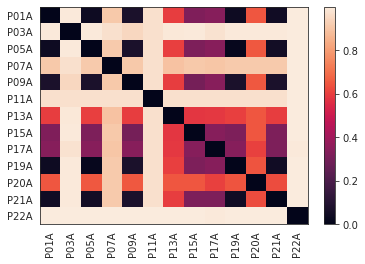

In [135]:
action_results.bray_curtis_distance_matrix.view(view_type=DistanceMatrix)

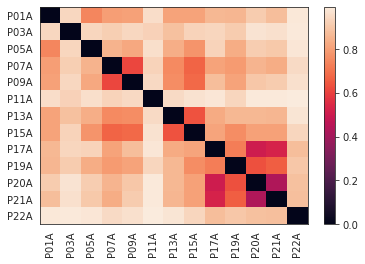

In [136]:
action_results.jaccard_distance_matrix.view(view_type=DistanceMatrix)

In [137]:
action_results.jaccard_emperor

<visualization: Visualization uuid: a6cb5c10-2a13-4637-9f7d-78d1204c54d1>

In [138]:
# alpha_rarefaction = diversity.visualizers.alpha_rarefaction(
#    table = denoisetable_ba,
#    phylogeny = rooted_tree,
#    max_depth = depth,
#    metadata = sample_metadata,
#    metrics = {'chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance'},
#    steps =  100
# )

# #   metrics = {'chao1', 'shannon', 'simpson', 'simpson_e', 'observed_features', 'fisher_alpha'}

# # save alpha_rarefacion
# alpha_rarefaction.visualization.save('./results/alpha_rar_new.qzv')

In [139]:
# load alpha_rarefacion
alpha_rar = q2.Visualization.load('./results/alpha_rar_new.qzv')
alpha_rar

<visualization: Visualization uuid: 33052260-2124-4f91-9eb4-ed70e8979cd4>

In [140]:
metrics = ['chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance']
#metrics = ['observed_features', 'fisher_alpha', 'chao1', 'shannon', 'simpson', 'simpson_e']

# alpha diversity metrics and significance

# init empty list
df_list = []
artifacts = {}

# loop over metrics
for metric in metrics:
    result = diversity.actions.alpha(
        table = action_results.rarefied_table,
        metric = metric
    )  # save to result
    artifact = result.alpha_diversity  # extract artifact
    artifacts[metric] = artifact
    df_list.append(artifact.view(view_type=q2.Metadata).to_dataframe())  # convert to DF and add to list
    
df= pd.concat(df_list, axis=1)  # merge list of dataframes, add each DF as new column (instead of new row (default))
df

,chao1,simpson,simpson_e,observed_features,dominance
Sample ID,,,,,
P01A,36.500000,0.072252,0.037168,29.0,0.927748
P03A,82.500000,0.874600,0.097250,82.0,0.125400
P05A,22.000000,0.022235,0.051137,20.0,0.977765
P07A,49.000000,0.709006,0.070133,49.0,0.290994
P09A,35.000000,0.136697,0.044552,26.0,0.863303
P11A,101.000000,0.956456,0.252363,91.0,0.043544
P13A,72.750000,0.797477,0.068579,72.0,0.202523
P15A,46.428571,0.498889,0.049889,40.0,0.501111
P17A,119.000000,0.563615,0.019257,119.0,0.436385


In [141]:
ndf = df.merge(sample_metadata.to_dataframe(), left_index=True, right_index=True)
ndf.head()

,chao1,simpson,simpson_e,observed_features,dominance,sample,location,origin,year,parkelj,specimen,population
Sample ID,,,,,,,,,,,,
P01A,36.5,0.072252,0.037168,29.0,0.927748,P01A,Planinska_jama,Paa200_t0,2015,no,Paa200,Linija reke Ljubljanice
P03A,82.5,0.874600,0.097250,82.0,0.125400,P03A,Planinska_jama,Paa201_t0,2015,no,Paa201,Linija reke Ljubljanice
P05A,22.0,0.022235,0.051137,20.0,0.977765,P05A,Stobe,Paa204_t10d,2016,no,Paa204,Dolenjska linija
P07A,49.0,0.709006,0.070133,49.0,0.290994,P07A,Planinska_jama,Paa209_t0,2017,no,Paa209,Linija reke Ljubljanice
P09A,35.0,0.136697,0.044552,26.0,0.863303,P09A,Planinska_jama,Paa210_t0,2019,no,Paa210,Linija reke Ljubljanice


In [142]:
col = 'observed_features'
meta_cols = ['year', 'population']
df1 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type="Opažene vrednosti"')

col = 'chao1'
df2 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type="Chao1"')

df = pd.concat([df1, df2])

In [143]:
df = df.rename(columns={'population': 'Genetska linija', 'year': 'Leto', 'value': 'Število ASV', 'type': 'Metrika'})
df.index.name = 'Osebek'

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/bacteria_obs-feat_chao1.png


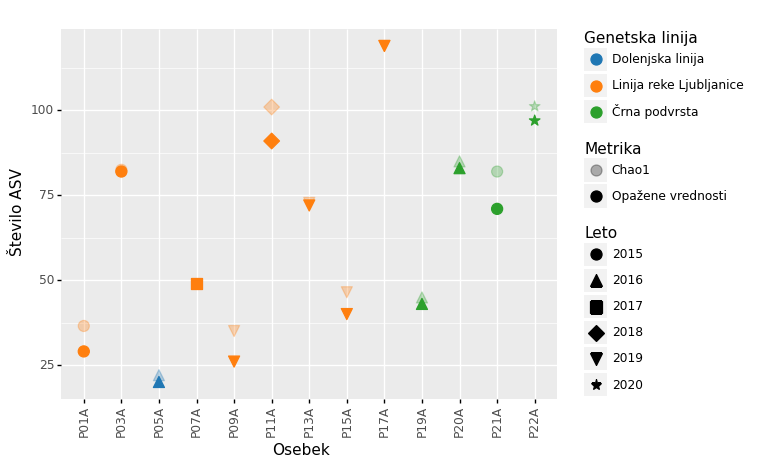

<ggplot: (8786847244882)>

In [144]:
from plotnine import *
from plotnine.data import *

p = (
    ggplot(df, aes(x=df.index, y='Število ASV', shape='Leto', color='Genetska linija', alpha='Metrika'))
    + geom_point(size=4)
    + labs(x='Osebek', y='Število ASV')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + scale_alpha_manual([0.3, 1.0])
    + theme(axis_text_x=element_text(rotation=90))
)

p.save('./results/bacteria_obs-feat_chao1.png')

p

In [145]:
ndf

,chao1,simpson,simpson_e,observed_features,dominance,sample,location,origin,year,parkelj,specimen,population
Sample ID,,,,,,,,,,,,
P01A,36.500000,0.072252,0.037168,29.0,0.927748,P01A,Planinska_jama,Paa200_t0,2015,no,Paa200,Linija reke Ljubljanice
P03A,82.500000,0.874600,0.097250,82.0,0.125400,P03A,Planinska_jama,Paa201_t0,2015,no,Paa201,Linija reke Ljubljanice
P05A,22.000000,0.022235,0.051137,20.0,0.977765,P05A,Stobe,Paa204_t10d,2016,no,Paa204,Dolenjska linija
P07A,49.000000,0.709006,0.070133,49.0,0.290994,P07A,Planinska_jama,Paa209_t0,2017,no,Paa209,Linija reke Ljubljanice
P09A,35.000000,0.136697,0.044552,26.0,0.863303,P09A,Planinska_jama,Paa210_t0,2019,no,Paa210,Linija reke Ljubljanice
P11A,101.000000,0.956456,0.252363,91.0,0.043544,P11A,Planinska_jama,Paa211_t0,2018,no,Paa211,Linija reke Ljubljanice
P13A,72.750000,0.797477,0.068579,72.0,0.202523,P13A,Planinska_jama,Paa219_t0,2019,no,Paa219,Linija reke Ljubljanice
P15A,46.428571,0.498889,0.049889,40.0,0.501111,P15A,Planinska_jama,Paa220_t0,2019,no,Paa220,Linija reke Ljubljanice
P17A,119.000000,0.563615,0.019257,119.0,0.436385,P17A,Planinska_jama,Paa221_t0,2019,no,Paa221,Linija reke Ljubljanice


In [146]:
ndf = ndf.rename(columns={'population': 'Genetska linija', 'year': 'Leto'})
ndf.index.name = 'Osebek'
ndf

,chao1,simpson,simpson_e,observed_features,dominance,sample,location,origin,Leto,parkelj,specimen,Genetska linija
Osebek,,,,,,,,,,,,
P01A,36.500000,0.072252,0.037168,29.0,0.927748,P01A,Planinska_jama,Paa200_t0,2015,no,Paa200,Linija reke Ljubljanice
P03A,82.500000,0.874600,0.097250,82.0,0.125400,P03A,Planinska_jama,Paa201_t0,2015,no,Paa201,Linija reke Ljubljanice
P05A,22.000000,0.022235,0.051137,20.0,0.977765,P05A,Stobe,Paa204_t10d,2016,no,Paa204,Dolenjska linija
P07A,49.000000,0.709006,0.070133,49.0,0.290994,P07A,Planinska_jama,Paa209_t0,2017,no,Paa209,Linija reke Ljubljanice
P09A,35.000000,0.136697,0.044552,26.0,0.863303,P09A,Planinska_jama,Paa210_t0,2019,no,Paa210,Linija reke Ljubljanice
P11A,101.000000,0.956456,0.252363,91.0,0.043544,P11A,Planinska_jama,Paa211_t0,2018,no,Paa211,Linija reke Ljubljanice
P13A,72.750000,0.797477,0.068579,72.0,0.202523,P13A,Planinska_jama,Paa219_t0,2019,no,Paa219,Linija reke Ljubljanice
P15A,46.428571,0.498889,0.049889,40.0,0.501111,P15A,Planinska_jama,Paa220_t0,2019,no,Paa220,Linija reke Ljubljanice
P17A,119.000000,0.563615,0.019257,119.0,0.436385,P17A,Planinska_jama,Paa221_t0,2019,no,Paa221,Linija reke Ljubljanice


/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/bacteria_simpson_e.png


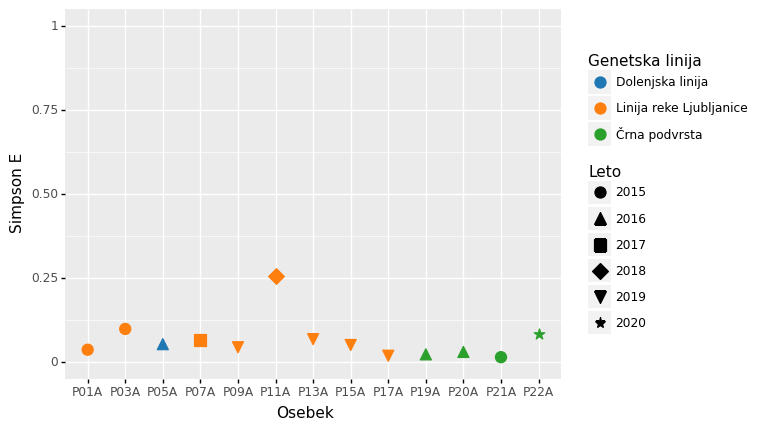

<ggplot: (8786699913909)>

In [122]:
simpson = (
    ggplot(ndf, aes(x=ndf.index, y='simpson_e', shape='Leto', color='Genetska linija'))
    + geom_point(size=4)
    + labs(x='Osebek', y='Simpson E')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + ylim(0,1)
)

simpson.save('./results/bacteria_simpson_e.png')
simpson 

In [ ]:
# dominance = (
#     ggplot(ndf, aes(x=ndf.index, y='dominance', shape='year', color='population'))
#     + geom_point(size=4)
#     + labs(x='Sample ID', y='dominance')
#     + scale_color_manual(['C0', 'C1', 'C2'])
#     + ylim(0,1)
# )

# dominance.save('./results/bacteria_dominance.png')
# dominance

In [ ]:
# visualisations of alpha diversity metrics
visualizations = {}

for key, value in artifacts.items():
    visualizations[key] = diversity.visualizers.alpha_group_significance(
        alpha_diversity = value,
        metadata = sample_metadata
    ).visualization

In [ ]:
# # simpson viz
# visualizations['simpson_e']

# # simpson viz
# visualizations['simpson']

# # fisher_alpha viz
# visualizations['fisher_alpha']

# # evenness_vector viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.evenness_vector,
#     metadata = sample_metadata
# ).visualization

# # faith_pd viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.faith_pd_vector,
#     metadata = sample_metadata
# ).visualization

# # observed_features viz
# visualizations['observed_features']

# # chao1 viz
# visualizations['chao1']

# # shannon viz
# visualizations['shannon']

### BETA DIVERSITY

In [ ]:
# make a subset, filter out dolenjska linija P05A
denoisetable_subset_population = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_ba,
    metadata = sample_metadata,
    where = "[population] IN ('Linija reke Ljubljanice', 'Črna podvrsta')"
)

In [ ]:
# make a subset, filter out P07A (2017), P11A (2018), P22A (2020); leave 2015, 2016, 2019
denoisetable_subset_year = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_ba,
    metadata = sample_metadata,
    where = "[year] IN ('2015', '2016', '2019')"
)

In [ ]:
# determine depth/s from alpha_rarefaction
# determine conditions from metadata column names
depth = 27291
condition = 'population'

core_metrics_results_subset_population = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_population.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

In [ ]:
depth = 27291
condition = 'year'

core_metrics_results_subset_year = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_year.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

#### PERMANOVA

In [ ]:
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "permanova",
    pairwise = True
)
permanova_population.visualization
# statistično značilno skupine enake - potrjena nulta hpoteza

In [ ]:
# PERMANOVA year
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "permanova",
    pairwise = True
)
permanova_year.visualization

# ne moremo trdit da so si med leti enake

#### PERMANOVA ADONIS

Thefunction partitions sums of squares of a multivariate data set, and is
directly analogous to MANOVA (multivariate analysis of variance). This
action differs from beta_group_significance in that it accepts R formulae
to perform multi-way ADONIS tests; beta_group_signficance only performs
one-way tests.

In [ ]:
adonis = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "population+year"
)

adonis.visualization

In [ ]:
adonis2 = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "year+population"
)

adonis2.visualization

In [ ]:
adonis = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "population*year"
)

adonis.visualization

In [ ]:
adonis = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "year*population"
)

adonis.visualization

#### ANOSIM

In [ ]:
anosim_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "anosim",
    pairwise = True
)
anosim_population.visualization

In [ ]:
# anosim year

anosim_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "anosim",
    pairwise = True
)
anosim_year.visualization